In [1]:
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt

class BallDropLab:
    
    @classmethod
    def calculate_tinf(cls, steel_args, nylon_args):
        m_steel, t_steel, d_steel = steel_args
        m_nylon, t_nylon, d_nylon = nylon_args
        
        t_minf = (t_steel*m_steel - t_nylon*m_nylon)/(m_steel-m_nylon)
        d_minf = 1/(m_steel-m_nylon) \
            * np.sqrt((m_steel*d_steel)**2 + (m_nylon*d_nylon)**2)

        return t_minf, d_minf
    
    @classmethod
    def calculate_xy(cls, height, d_height, t, d_t, b, berr):
        x = t
        y = (height+b)/t
        y_err = np.sqrt(d_t**2 * ((height+b)/t**2)**2 + \
                        d_height**2 * (1/t)**2 + \
                        berr**2 * (1/t)**2)
        return x, y, y_err
    
    @classmethod
    def calculate_xy2(cls, height, d_height, t, d_t):
        x = t
        y = (height)/t
        y_err = np.sqrt(d_t**2 * ((height)/t**2)**2 + \
                        d_height**2 * (1/t)**2)
        return x, y, y_err
    
import pandas
import numpy as np

from mxp_tools.fit import Analysis, Model, FitLSQ

raw_data = pandas.read_csv('ball_data.csv')
calibration_data = pandas.read_csv('ball_calibration.csv')
# display(raw_data)

data = pandas.DataFrame()
data['Height'] = raw_data['Height']

steel_names = ['Steel %d' % i for i in [1, 2, 3]]
nylon_names = ['Nylon %d' % i for i in [1, 2, 3]]

data['Nylon Mean'] = np.mean(raw_data[nylon_names], axis=1)
data['Nylon Stdev'] = np.std(raw_data[nylon_names], axis=1)
data['Steel Mean'] = np.mean(raw_data[steel_names], axis=1)
data['Steel Stdev'] = np.std(raw_data[steel_names], axis=1)
# display(data)




# height = data['Height']
# t_nylon = data['Nylon Mean']
# t_steel = data['Steel Mean']

# t_nylon_err = data['Nylon Stdev']
# t_steel_err = data['Steel Stdev']

nylon_stdev = np.std(calibration_data['nylon'])
steel_stdev = np.std(calibration_data['steel'])

t_nylon = np.array(raw_data[nylon_names])
# np.add(t_nylon, -data['Nylon Mean'], axis=1)
nylon_mean = np.array(data['Nylon Mean']).reshape(-1,1).repeat(3, axis=1)
# nylon_std = np.array(data['Nylon Stdev']).reshape(-1,1).repeat(3, axis=1)
df = pandas.DataFrame((t_nylon - nylon_mean)/nylon_stdev)
df['Height'] = data['Height']
df['stdev'] = data['Nylon Stdev']/nylon_stdev
df


# print('nylon_stdev:', nylon_stdev)
# print('steel_stdev:', steel_stdev)

# m_steel = 28.17
# m_nylon = 4.09
# b = 1.0
# berr = 0

,0,1,2,Height,stdev
0,1.374036,-0.312281,-1.061755,100.413,1.018629
1,-0.499649,1.186667,-0.687018,89.256,0.842580
2,1.249124,-0.624562,-0.624562,80.090,0.883264
3,0.374737,0.374737,-0.749474,70.082,0.529958
4,0.624562,0.249825,-0.874386,60.084,0.636931
5,0.312281,-0.062456,-0.249825,50.064,0.233690
6,-0.062456,-0.624562,0.687018,45.074,0.537268
7,-0.687018,0.437193,0.249825,40.036,0.491780
8,-0.624562,-0.062456,0.687018,35.030,0.537268
9,2.560703,-0.624562,-1.936141,30.000,1.888202


In [2]:
raw_data = pandas.read_csv('ball_data.csv')
calibration_data = pandas.read_csv('ball_calibration.csv')

steel_names = ['Steel %d' % i for i in [1, 2, 3]]
nylon_names = ['Nylon %d' % i for i in [1, 2, 3]]

steel_data = raw_data[steel_names]
nylon_data = raw_data[nylon_names]

nylon_calib_stdev = np.std(calibration_data['nylon'])
steel_calib_stdev = np.std(calibration_data['steel'])

nylon_data['mean'] = np.mean(nylon_data[nylon_names], axis=1)

def process(df, names, calib_std):
    data = np.array(df[names])
    mean = np.mean(data, axis=1)
    stdev = np.std(data, axis=1)
    
    stdev = np.array([stdev, np.ones_like(stdev)*calib_std]).max(axis=0)
    
#     chi = (data - mean.reshape(-1,1).repeat(3, axis=1))/stdev
    
    df['mean'] = mean
    df['stdev'] = stdev
    for n in names:
        df['chi '+n] = (df[n]-mean)/calib_std
        
#     df['max_std'] = np.array([stdev, np.ones_like(stdev)])
    return df

steel_data = process(steel_data, steel_names, steel_calib_stdev)
nylon_data = process(nylon_data, nylon_names, nylon_calib_stdev)
display(nylon_data)
display(steel_data)

/home/michael/Documents/College/jupyter/venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/michael/Documents/College/jupyter/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/michael/Documents/College/jupyter/venv/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Nylon 1,Nylon 2,Nylon 3,mean,stdev,chi Nylon 1,chi Nylon 2,chi Nylon 3
0,0.42740,0.42731,0.42727,0.427327,0.000054,1.374036,-0.312281,-1.061755
1,0.40144,0.40153,0.40143,0.401467,0.000053,-0.499649,1.186667,-0.687018
2,0.37916,0.37906,0.37906,0.379093,0.000053,1.249124,-0.624562,-0.624562
3,0.35298,0.35298,0.35292,0.352960,0.000053,0.374737,0.374737,-0.749474
4,0.32519,0.32517,0.32511,0.325157,0.000053,0.624562,0.249825,-0.874386
5,0.29487,0.29485,0.29484,0.294853,0.000053,0.312281,-0.062456,-0.249825
6,0.27861,0.27858,0.27865,0.278613,0.000053,-0.062456,-0.624562,0.687018
7,0.26136,0.26142,0.26141,0.261397,0.000053,-0.687018,0.437193,0.249825
8,0.24319,0.24322,0.24326,0.243223,0.000053,-0.624562,-0.062456,0.687018
9,0.22381,0.22364,0.22357,0.223673,0.000101,2.560703,-0.624562,-1.936141


,Steel 1,Steel 2,Steel 3,mean,stdev,chi Steel 1,chi Steel 2,chi Steel 3
0,0.42588,0.42595,0.42601,0.425947,0.000102,-6.541629e-01,3.270814e-02,0.621455
1,0.39999,0.40016,0.40009,0.400080,0.000102,-8.831199e-01,7.849954e-01,0.098124
2,0.37775,0.37782,0.37794,0.377837,0.000102,-8.504117e-01,-1.635407e-01,1.013952
3,0.35187,0.35208,0.35216,0.352037,0.000122,-1.635407e+00,4.252059e-01,1.210201
4,0.32432,0.32446,0.32451,0.324430,0.000102,-1.079369e+00,2.943733e-01,0.784995
5,0.29408,0.29429,0.29425,0.294207,0.000102,-1.242909e+00,8.177036e-01,0.425206
6,0.27793,0.27817,0.27818,0.278093,0.000116,-1.602699e+00,7.522873e-01,0.850412
7,0.26073,0.26072,0.26082,0.260757,0.000102,-2.616651e-01,-3.597896e-01,0.621455
8,0.24252,0.24261,0.24259,0.242573,0.000102,-5.233303e-01,3.597896e-01,0.163541
9,0.22308,0.22306,0.22304,0.223060,0.000102,1.962489e-01,-2.723500e-13,-0.196249


nylon_calib_stdev 5.337075510051931e-05
steel_calib_stdev 0.00010191141987039066


,Height,Nylon Mean,Nylon Stdev,Steel Mean,Steel Stdev,Nylon Uncertainty,Steel Uncertainty,T minf,T minf err
0,100.413,0.427327,0.000054,0.425947,0.000053,0.000054,0.000102,0.425712,0.000120
1,89.256,0.401467,0.000045,0.400080,0.000070,0.000053,0.000102,0.399844,0.000120
2,80.090,0.379093,0.000047,0.377837,0.000078,0.000053,0.000102,0.377623,0.000120
3,70.082,0.352960,0.000028,0.352037,0.000122,0.000053,0.000122,0.351880,0.000143
4,60.084,0.325157,0.000034,0.324430,0.000080,0.000053,0.000102,0.324307,0.000120
5,50.064,0.294853,0.000012,0.294207,0.000091,0.000053,0.000102,0.294097,0.000120
6,45.074,0.278613,0.000029,0.278093,0.000116,0.000053,0.000116,0.278005,0.000135
7,40.036,0.261397,0.000026,0.260757,0.000045,0.000053,0.000102,0.260648,0.000120
8,35.030,0.243223,0.000029,0.242573,0.000039,0.000053,0.000102,0.242463,0.000120
9,30.000,0.223673,0.000101,0.223060,0.000016,0.000101,0.000102,0.222956,0.000120


1
(array([4]),)


array([ 30.22727804, 488.89319817,   1.05386726])

array([0.24172298, 0.53961583, 0.02284319])

params [ 30.22727804 488.89319817   1.05386726] param errors [0.24172298 0.53961583 0.02284319]
Reduced chi^2: 1.94
PTE: 0.9868
977.7863963342519 1.0792316677316023
b:  1.0538672609375883 0.022843193575927907
g:  977.7863963342519 1.0792316677316023
-2.588511576592192


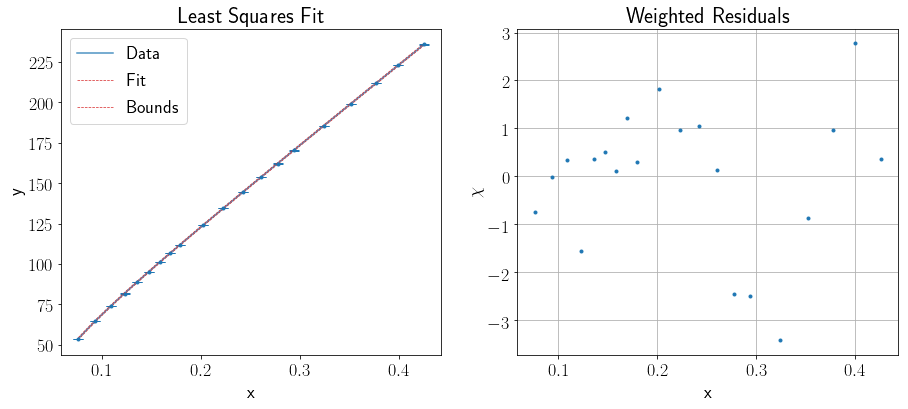

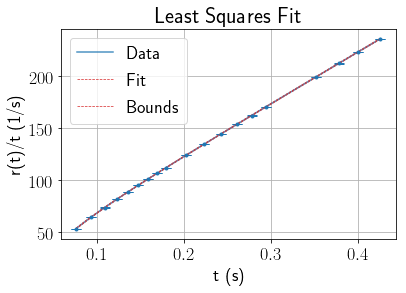

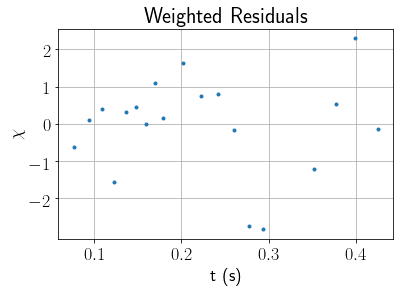

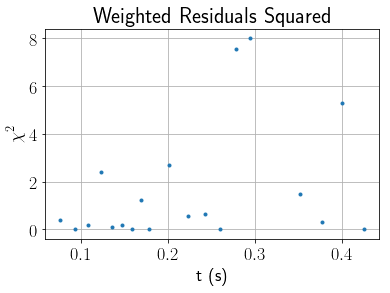

In [3]:
%matplotlib inline
from mxp_tools.labs.balldrop import BallDropLab
from mxp_tools.fit import Analysis, Model, FitLSQ
import scipy.optimize 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

def fx(t, a, b, c):
    return a+b*t-c/t

data = BallDropLab(0.001)
display(data.data)

x, y, yerr = data.calculate_xy()

popt, pcov = scipy.optimize.curve_fit(fx, x, y, sigma=yerr)
perr = np.sqrt(np.diag(pcov))
model = Model(fx, popt, perr)
analysis = Analysis(model, x, y, yerr)
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
analysis.plot(ax)

ax = fig.add_subplot(122)
analysis.plot_chi(ax)
ax.grid()

new_points = np.abs(analysis.kai)<3
index = np.where(new_points)
print(np.sum(new_points==False))
print(np.where(new_points==False))
x = x[index]
y = y[index]
yerr = yerr[index]

# print(len(height) - len(x))

popt, pcov = scipy.optimize.curve_fit(fx, x, y, sigma=yerr)
perr = np.sqrt(np.diag(pcov))

display(popt)
display(perr)

model = Model(fx, popt, perr)
analysis = Analysis(model, x, y, yerr)

# fig = plt.figure(figsize=(10, 15))
# ax = fig.add_subplot(211)
# analysis.plot(ax)
# ax.grid()
# ax.set_xlabel('t(s)')
# ax.set_ylabel('r(t)/t')

# ax = fig.add_subplot(212)
# analysis.plot_chi(ax)
# ax.grid()

# fig.savefig('fig1.png')
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
analysis.plot(ax)
ax.grid()
ax.set_xlabel('t (s)')
ax.set_ylabel('r(t)/t (1/s)')
fig.subplots_adjust(bottom=0.15)
fig.savefig('fig2.png')

fig = plt.figure()
ax = fig.add_subplot(111)
analysis.plot_chi(ax)
ax.set_xlabel('t (s)')
ax.set_yticks(np.arange(-2,3,1))
ax.grid()
fig.subplots_adjust(bottom=0.15)
fig.savefig('fig3.png')

fig = plt.figure()
ax = fig.add_subplot(111)
analysis.plot_chi2(ax)
ax.set_xlabel('t (s)')
# ax.set_yticks(np.arange(-2,3,1))
ax.grid()
fig.subplots_adjust(bottom=0.15)
fig.savefig('fig4.png')

print(analysis)
print(popt[1]*2, perr[1]*2)
g = popt[1]*2
gerr = perr[1]*2

b = popt[2]
berr = perr[2]
print('b: ', b, berr)

print('g: ', g, gerr)
g0 = 980.58
print((g-g0)/gerr)